In [39]:
#Imports:
import numpy as np
import math
import scipy.linalg
from scipy.sparse.linalg import bicg, gmres
from scipy.sparse import csr_matrix
import timeit
import matplotlib.pyplot as plt
import time

***Zadanie 1***   
Rozwiąż analitycznie poniższy układ równań dla $i = 1, 2$. Jak zmienia się rozwiązanie wraz ze zmianą wektora prawych stron? Oblicz współczynnik uwarunkowania macierzy $A$.<br>
$Ax = b_i$,<br>
$A = \left[\begin{matrix}
1 & 1 \\
1 & 1.0001\\
\end{matrix}\right]$,
$b_1 = \left[\begin{matrix}
2 \\
2.0001 \\
\end{matrix}\right]$,
$b_2 = \left[\begin{matrix}
2 \\
2 \\
\end{matrix}\right]$.<br>

Wynik:
$$
x_1 = \left[\begin{array}{cc} 
1 \\
1
\end{array}\right] \\
x_2 = \left[\begin{array}{cc} 
2 \\
0
\end{array}\right]
$$

In [2]:
A = [
    [1, 1],
    [1, 1.0001]
]

normR = np.linalg.cond(A, 1)      #Pierwsza norma - Max([Suma modułów elementów kolumny macierzy macierzy A])
normC = np.linalg.cond(A, np.inf) #Pierwsza norma - Max([Suma modułów elementów wiersza macierzy macierzy A])

print("Norma pierwsza (kolumnowa): {:.2f} \nNorma nieskończoności (wierszowa): {:.2f}".format(normR, normC))

Norma pierwsza (kolumnowa): 40004.00 
Norma nieskończoności (wierszowa): 40004.00


Jak widac norma macierzowa jest bardzo duża, a więc macierz jest źle uwarunkowana, co też widzimy na powyższym przykładzie bardzo różnych wyników dla minimalnie innych danych wejściowych.

***Zadanie 2***  
Dana jest macierz Hilberta o wymiarach $8 \times 8$. Oblicz współczynniki uwarunkowania macierzy korzystając
z normy kolumnowej, spektralnej oraz wierszowej. Co na ich podstawie można powiedzieć o uwarunkowaniu tej macierzy?   
**Wskazówka:** Elementy macierzy Hilberta są określone przez wzór $h_{i,j}=\frac{1}{i+j-1}$.

In [3]:
size = 8
hilbert = np.array(
    [[1/(i+j-1) for i in range(1, size+1)] for j in range (1, size+1)]
)

print("Macierz Hilberta {}x{}:\n".format(size, size), np.array_str(hilbert, precision=2), "\n", sep="")

print("Norma pierwsza (kolumnowa): {:.2f}".format(np.linalg.cond(hilbert, 1)))
print("Norma nieskończoności (wierszowa): {:.2f}".format(np.linalg.cond(hilbert, np.inf)))
print("Norma druga (spektralna - odchylenie standardowe): {:.2f}".format(np.linalg.cond(hilbert)))

Macierz Hilberta 8x8:
[[1.   0.5  0.33 0.25 0.2  0.17 0.14 0.12]
 [0.5  0.33 0.25 0.2  0.17 0.14 0.12 0.11]
 [0.33 0.25 0.2  0.17 0.14 0.12 0.11 0.1 ]
 [0.25 0.2  0.17 0.14 0.12 0.11 0.1  0.09]
 [0.2  0.17 0.14 0.12 0.11 0.1  0.09 0.08]
 [0.17 0.14 0.12 0.11 0.1  0.09 0.08 0.08]
 [0.14 0.12 0.11 0.1  0.09 0.08 0.08 0.07]
 [0.12 0.11 0.1  0.09 0.08 0.08 0.07 0.07]]

Norma pierwsza (kolumnowa): 33872790820.23
Norma nieskończoności (wierszowa): 33872790819.49
Norma druga (spektralna - odchylenie standardowe): 15257575547.77


Na ich podstawie możemy stwierdzić że macierz ta jest bardzo źle uwarunkowana. Zgadza się to z założeniem macierzy Hilberta.

***Zadanie 3***<br>
Dane jest $n = 20$. Używając funkcji <i>linspace</i> zdefiniuj wektor $t =\left[\begin{matrix} t_0 & \ldots & t_{n-1}\end{matrix}\right]^T$, którego wartości należą do przedziału $[0,1]$ oraz wektor $b =\left[\begin{matrix}
\cos(4t_0) & \ldots & \cos(4t_{n-1})\end{matrix}\right]^T$. Następnie wygeneruj macierz $A$ daną wzorem:

$\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & t_{n-1} & t_{n-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]$
  
**Wskazówka**: Do definicji macierzy $A$ można użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  

Rozwiąż układ równań $Ax=b$ za pomocą następujacych metod:
1. Metody [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) z pakietu numpy.
2. Metody rozkładu QR rozwiązywania układów równań. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).
3. Domyślnej dla Pythona metody rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq). Sprawdź, jak ta metoda zachowuje się w przypadku układu z macierzą kwadratową.
4. Porównaj czasy wykonania wszystkich metod ze sobą.
5. <b>Porównaj jakość otrzymanych wyników</b>. Do porównania możesz zastosować np. normę $||r||$ gdzie $r$ zdefiniowane jest jako $r=b-Ax$ (tzw. residuum).

In [48]:
#0. Define test data:
t = np.linspace(0, 1, 20)
A = np.vander(t, increasing=True)
b = np.array([math.cos(4*t[i]) for i in range(0, 20)])

#1. numpy.linalg.solve:
def s1(A, b):
    return np.linalg.solve(A, b)

#2. scipy.linalg.solve_triangular:
def s2(A, b):  
    Q, R = np.linalg.qr(A)
    #Ax = b  ==> QRx = b  ==>  Rx = Q^-1 * b  ==>  Rx = Q^T * b
    return scipy.linalg.solve_triangular(R, np.dot(Q.T, b))

#3. numpy.linalg.lstsq:
def s3(A, b):
    return np.linalg.lstsq(A, b, rcond=None)[0]

#Check whether all the solutions are correct or not:
x1 = s1(A,b)
x2 = s2(A,b)
x3 = s3(A,b)
# print(A.dot(x1), A.dot(x2), A.dot(x3), b, sep="\n")

#4. Porównaj czasy wykonania wszystkich metod ze sobą:
time_s1 = timeit.timeit('s1(A,b)', setup='from __main__ import s1, A, b', number=1000) #Runs the test 1000 times
time_s2 = timeit.timeit('s2(A,b)', setup='from __main__ import s2, A, b', number=1000)
time_s3 = timeit.timeit('s3(A,b)', setup='from __main__ import s3, A, b', number=1000)
print("1. Czas wykonania numpy.linalg.solve:            {:.8f}ms".format(time_s1/1000))
print("2. Czas wykonania scipy.linalg.solve_triangular: {:.8f}ms".format(time_s2/1000))
print("3. Czas wykonania numpy.linalg.lstsq:            {:.8f}ms\n".format(time_s3/1000))


#5. Porównaj jakość otrzymanych wyników.
def residuum(A, b, x):
    result = 0
    for cell in b - A.dot(x):
        result += abs(cell)
    return result

print("1. Jakoś wyniku numpy.linalg.solve:            ||r|| = {:.3}".format(residuum(A, b, x1))) 
print("2. Jakoś wyniku scipy.linalg.solve_triangular: ||r|| = {:.3}".format(residuum(A, b, x2)))
print("3. Jakoś wyniku numpy.linalg.lstsq:            ||r|| = {:.3}".format(residuum(A, b, x3)))

1. Czas wykonania numpy.linalg.solve:            0.00004907ms
2. Czas wykonania scipy.linalg.solve_triangular: 0.00027377ms
3. Czas wykonania numpy.linalg.lstsq:            0.00021035ms

1. Jakoś wyniku numpy.linalg.solve:            ||r|| = 7.3e-15
2. Jakoś wyniku scipy.linalg.solve_triangular: ||r|| = 1.71e-14
3. Jakoś wyniku numpy.linalg.lstsq:            ||r|| = 1.89e-14


Residuum ( $||b-Ax||$ ) np.linalg.solve jest o około 60% mniejsze w porównaniu do pozostałych dwóch metod. Najwolniejsza jest metoda z dekompozycją QR.

*Wniosek*: metoda numpy.linalg.solve daje najdokładniejszy wynik w najszybszym czasie.

***Zadanie 4***  
Wygeneruj macierz $A$ o wymiarach $500 \times 500$ w następujący sposób:
1. Umieść na głównej przekątnej liczbę 1.
2. Pozostałe miejsca w macierzy uzupełnij liczbami z przedziału $[-1,1]$ tak by uzyskać macierz symetryczną ($A = A^{\mathrm{T}}$).
3. W opracowywanej macierzy zastąp zerem wszystkie wartości które spełniają warunek $|a_{ij}|> \tau$, poza tymi które znajdują się na diagonalnej.

**Wskazówka:** Do szybkiej konstrukcji macierzy $A$ można wykorzystać funkcje: [ones](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.ones.html), [diag](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.diag.html?highlight=diag#numpy.diag), [uniform](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.uniform.html?highlight=uniform#numpy.random.uniform), [tril](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.tril.html), [logical_not](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logical_not.html?highlight=logical_not#numpy.logical_not)

Po wygenerowaniu macierzy $A$ wylosuj wektor $b$, którego wartości również należą do przedziału $[-1,1]$. Dla układu $Ax=b$ wykonaj następujące zadania:
1. Sprawdź, jak zachowuje się współczynnik uwarunkowania macierzy w zależności od wartości $\tau$, dla $\tau \in \{ 0.01, 0.05, 0.1, 0.2, 0.5, 0.75\}$. Narysuj wykres zależności współczynnika uwarunkowania macierzy od wartości $\tau$.
2. Dla wszystkich $\tau$ rozwiąż układ równań przy pomocy funkcji: [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html), [bicg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.bicg.html) oraz [gmres](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html). Na potrzeby dwóch ostatnich metod skorzysaj z funkcji [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) w celu wygenerowania [macierzy rzadkich](https://pl.wikipedia.org/wiki/Macierz_rzadka) bazujących na macierzach $A$.
3. Sprawdź, jak uwarunkowanie macierzy wpływa na jakość rozwiązania układu przez wszystkie metody oraz na czas ich wykonania. <b>Swoje obserwacje przedstaw na odpowiednich wykresach.</b>

Calculating matrix conditionals... Done.


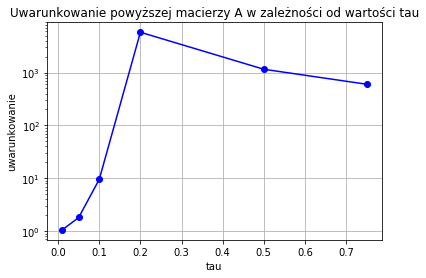

Generating 'A' matrices and converting them to sparse format for the gmres method... Done.
Solving the equasions with numpy.linalg.solve... Done
Solving the equasions with scipy.sparse.linalg.bicg... Done
Solving the equasions with scipy.sparse.linalg.gmres... Done


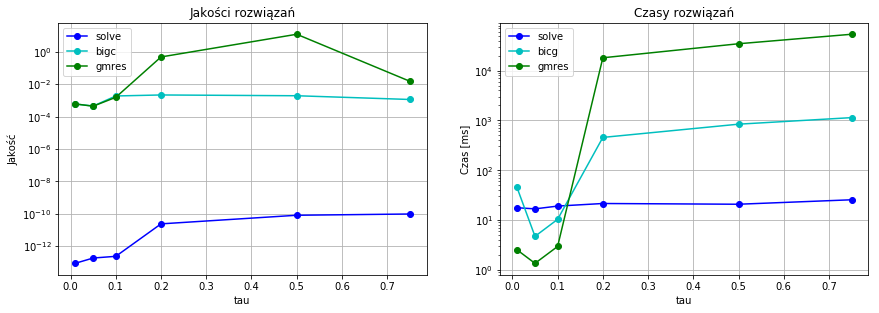

In [45]:
def makeA(tau):
    #1. Generate a matrix with random values between -1 and 1
    randMatrix = np.random.rand(500,500) * 2 - 1
    #2. Zero out all the cell on or above the diagonal
    zeroedMatrix = np.tril(randMatrix, -1)
    #3. Mirror all the cell with respect to the diagonal
    mirroredMatrix = zeroedMatrix + zeroedMatrix.T
    #4. Zero out the cells that fullfils the condition that |a_ij| > tau
    mirroredMatrix[abs(mirroredMatrix) > tau] = 0
    #5. Add ones on the diagonal
    A = mirroredMatrix + np.diag(np.ones(500))
    return A
    
def makeb():
    return np.random.rand(500) * 2 - 1

#1. Sprawdź, jak zachowuje się współczynnik uwarunkowania macierzy w zależności od wartości tau.
print('Calculating matrix conditionals... ', end='')
taus = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
y = np.zeros(6)

#Calculating a mean of n runs to reduce the variance between runs a little
n = 3
for i in range(0, n):
    y += [np.linalg.cond(makeA(i)) for i in taus]
y /= n
print('Done.')
plt.semilogy(taus, y, 'bo-')
plt.xlabel('tau')
plt.ylabel('uwarunkowanie')
plt.title('Uwarunkowanie powyższej macierzy A w zależności od wartości tau')
plt.grid()
plt.show()

#2. Dla wszystkich tau rozwiąż układ równań przy pomocy funkcji: solve, bigc, gmres
print('Generating \'A\' matrices and converting them to sparse format for the gmres method... ', end='')
A = [makeA(i) for i in taus]
sparseA = [csr_matrix(makeA(i)) for i in taus]
b = makeb()
print('Done.')

solveNorms = np.array([
    np.zeros(6),
    np.zeros(6),
    np.zeros(6)
])
solveTimes = np.array([
    np.zeros(6),
    np.zeros(6),
    np.zeros(6)
])

#2-1. numpy.linalg.solve:
print('Solving the equasions with numpy.linalg.solve... ', end='')
for i in range(0, 6):
    start = time.process_time()
    solveNorms[0][i] = np.linalg.norm(b - A[i].dot(np.linalg.solve(A[i], b)), ord=1)
    solveTimes[0][i] = time.process_time() - start
print('Done')

#2-2. scipy.sparse.linalg.bicg:
print('Solving the equasions with scipy.sparse.linalg.bicg... ', end='')
for i in range(0, 6):
    start = time.process_time()
    solveNorms[1][i] = np.linalg.norm(b - sparseA[i].dot(bicg(sparseA[i], b)[0]), ord=1)
    solveTimes[1][i] = time.process_time() - start
print('Done')
    
#2-3. scipy.sparse.linalg.gmres:
print('Solving the equasions with scipy.sparse.linalg.gmres... ', end='')
for i in range(0, 6):
    start = time.process_time()
    solveNorms[2][i] = np.linalg.norm(b - sparseA[i].dot(gmres(sparseA[i], b)[0]), ord=1)
    solveTimes[2][i] = time.process_time() - start
print('Done')
    
plt.subplot(121)
plt.semilogy(taus, solveNorms[0], 'bo-', label='solve')
plt.semilogy(taus, solveNorms[1], 'co-', label='bigc')
plt.semilogy(taus, solveNorms[2], 'go-', label='gmres')
plt.xlabel('tau')
plt.ylabel('Jakość')
plt.title('Jakości rozwiązań')
plt.legend()
plt.grid()

plt.subplot(122)
plt.semilogy(taus, solveTimes[0] * 1000, 'bo-', label='solve')
plt.semilogy(taus, solveTimes[1] * 1000, 'co-', label='bicg')
plt.semilogy(taus, solveTimes[2] * 1000, 'go-', label='gmres')
plt.xlabel('tau')
plt.ylabel('Czas [ms]')
plt.title('Czasy rozwiązań')
plt.legend()
plt.grid()

# plt.tight_layout()
plt.subplots_adjust(right=2, top=1)
plt.show()


*Wnioski*:

Jakość rozwiązań metodą solve jest najwyższa.

Metody korzystające ze 'sparse' formatu macierzy sa szybsze od numpy.linalg.solve tylko dla niskich tau, gdyż wtedy większość komórek macierzy jest wypełniona zerami w związku z czym ma sens zastosowanie tych metod. 

***Zadanie 5***<br>
Zaimplementuj iteracyjną metodę Gaussa-Seidla rozwiązywania układów równań liniowych. W celu weryfikacji poprawności rozwiąż przy jej pomocy dowolny układ równań oraz porównaj otrzymany wynik z rezultatem metody [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html). Dodatkowo rozwiąż przy jej pomocy poniższy układ równań i oceń jakość otrzymanego rozwiązania.<br>
$Ax = b$,<br>
$A = \left[\begin{matrix}
1 & 2 & 3 \\
2 & 1 & 3\\
3 & 2 & 1 \\
\end{matrix}\right]$,
$b = \left[\begin{matrix}
1 \\
2 \\
0 \\
\end{matrix}\right]$.

[algorytm](https://pl.wikipedia.org/wiki/Metoda_Gaussa-Seidla#Przyk%C5%82ad_w_Python_3_i_pakiecie_NumPy)

In [53]:
def gauss_seidl(A, b, iterLimit=100):
    x = np.zeros_like(b)
    for it_count in range(iterLimit):
        x_new = np.zeros_like(x)

        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_new, rtol=1e-8):
            return x

        x = x_new
        
    return x

A1 = np.array([
    [ 4., -2.,  1.],
    [ 2., -5., -2.],
    [-3.,  8.,  5.]
])
b1 = np.array([6, 4, -2])

x1_gs = gauss_seidl(A1, b1)
x1_solve = np.linalg.solve(A1, b1)

print("Jakość wyniku Gauss-Siedl:                                 ||r|| = {:.3}".format(residuum(A1, b1, x1_gs)))
print("Jakość wyniku numpy.linalg.solve:                          ||r|| = {:.3}\n".format(residuum(A1, b1, x1_solve)))


A = np.array([
    [1., 2., 3.],
    [2., 1., 3.],
    [3., 2., 1.],
])
b = np.array([1., 2., 0.])
x_gs = gauss_seidl(A, b)
x_solve = np.linalg.solve(A, b)
print("Jakość wyniku podanej macierzy metodą Gauss-Siedl:         ||r|| = {:.3}".format(residuum(A, b, x_gs)))
print("Jakość wyniku podanej macierzy metodą numpy.linalg.solve:  ||r|| = {:.3}".format(residuum(A, b, x_solve)))

Jakość wyniku Gauss-Siedl:                                 ||r|| = 5.0
Jakość wyniku numpy.linalg.solve:                          ||r|| = 2.66e-15

Jakość wyniku podanej macierzy metodą Gauss-Siedl:         ||r|| = 2.29e+63
Jakość wyniku podanej macierzy metodą numpy.linalg.solve:  ||r|| = 2.22e-16


Metoda Gaussa-Siedla nie działa dla podanej macierzy A ponieważ nie spełnia ona warunku koniecznego działania tejże metody